Principal Component Analysis --- 7:49 min
===

* 7:49 min | Última modificación: Septiembre 24, 2021 | [YouTube](https://youtu.be/mUq-bGMsloE)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Este es un algoritmo para la reducción de la dimensionalidad de los datos, que también suele ser usado para visualización. 

Para su análisis considere los siguientes puntos:

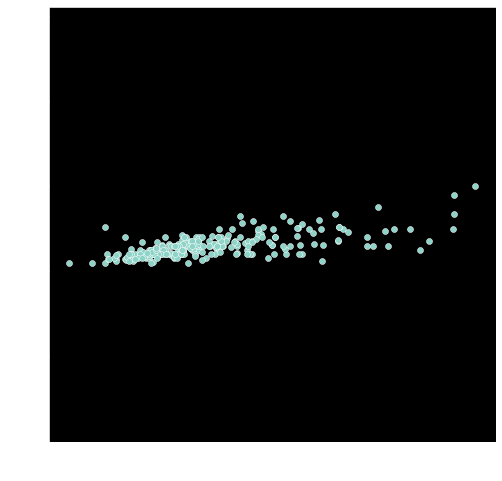

In [2]:
tips = sns.load_dataset("tips")

plt.figure(figsize=(8, 8))
plt.style.use("dark_background")
plt.axis("equal")
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

Claramente la gráfica muestra una relación lineal entre las variables. Aca el problema no es construir una regresión, sino establecer la relación entre las variables.

El objetivo del PCA es construir una secuencia de ejes principales de los datos, los cuales permiten su descripción. Para ello, los datos deben estar escalados.

In [3]:
from sklearn.preprocessing import StandardScaler

arr = tips[["total_bill", "tip"]].values
arr = StandardScaler().fit_transform(arr)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(arr)
display(
    pca.components_,
    pca.explained_variance_,
    pca.explained_variance_ratio_,
)

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

array([1.68263013, 0.32560032])

array([0.83786705, 0.16213295])

Para entender el significado de estos componentes, resulta más apropiado dibujar los ejes principales de los datos.

Las componentes definen la dirección los vectores, mientras que la varianza explicada corresponde al cuadrado de la longitud de los vectores. Estos definen las principales componentes de los datos.

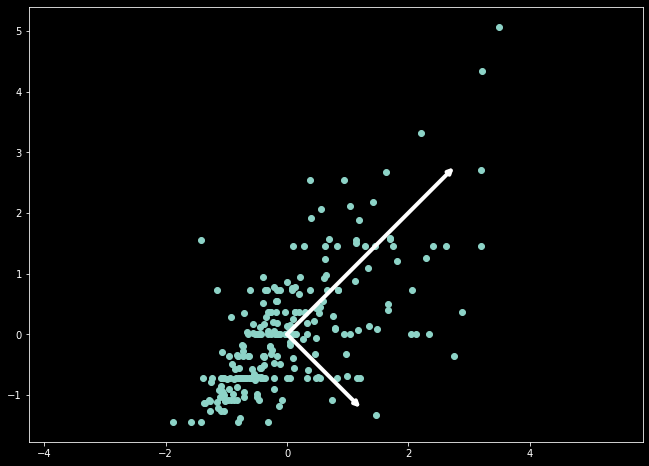

In [5]:
plt.figure(figsize=(11, 8))

plt.scatter(x=arr[:, 0], y=arr[:, 1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax = plt.gca()
    ax.annotate(
        "",
        pca.mean_ + v,
        pca.mean_,
        arrowprops=dict(
            arrowstyle="-|>",
            linewidth=4,
            shrinkA=0,
            shrinkB=0,
        ),
    )

plt.axis("equal")
plt.show()

In [6]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

X = digits.data
y = digits.target

In [7]:
pca = PCA(2)
X_proj = pca.fit_transform(X)

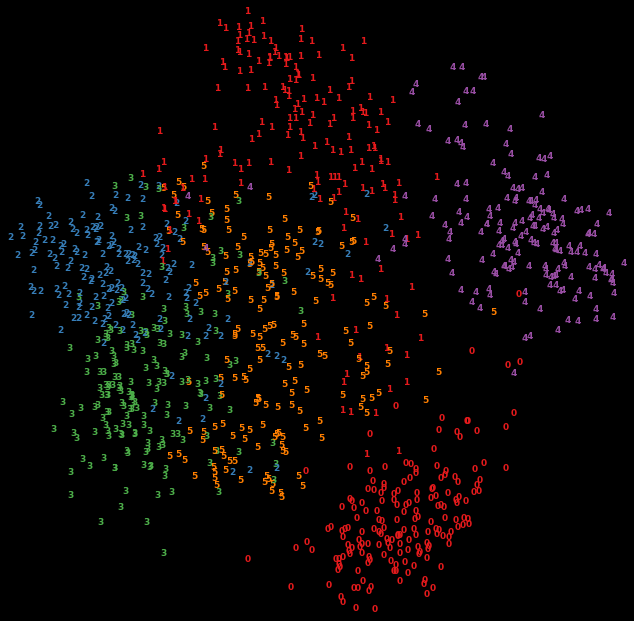

In [8]:
plt.figure(figsize=(11, 11))
plt.style.use("dark_background")

for i in range(X_proj.shape[0]):
    plt.text(
        X_proj[i, 0],
        X_proj[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 9},
    )

plt.xlim((X_proj[:, 0].min(), X_proj[:, 0].max()))
plt.ylim((X_proj[:, 1].min(), X_proj[:, 1].max()))

plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.xticks([])
plt.yticks([])

plt.show()

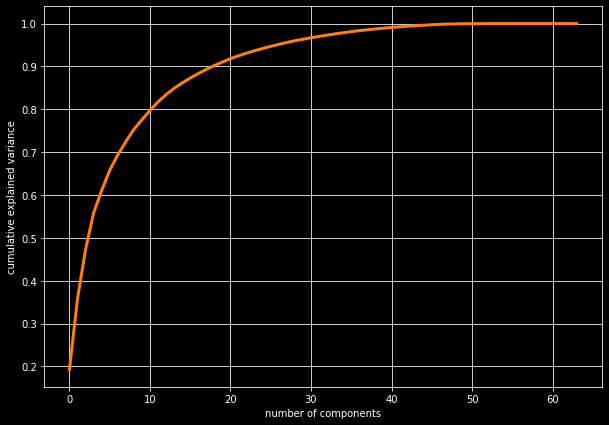

In [9]:
pca = PCA().fit(digits.data)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="tab:orange", linewidth=3)
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.grid()
plt.show()